In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import json
import time
from time import strftime
from datetime import datetime
import matplotlib 
from IPython.core.display import clear_output
from sklearn.externals import joblib
import seaborn as sns
import re
#import nlkt

In [2]:
bins=np.arange(0,50000+1000,1000)

In [735]:
bins

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
       18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000,
       27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000,
       36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000,
       45000, 46000, 47000, 48000, 49000, 50000])

In [483]:
features = joblib.load('/Final Features/Final_Features_{}-{}.pkl'.format(
            0,
            999))

features=features.drop(columns=["index0","index1"])

for i in range(1,len(bins)-1):
    
    star_ID = bins[i]
    fin_ID = bins[i+1]
    
    ff = joblib.load('/Final Features/Final_Features_{}-{}.pkl'.format(
            star_ID,
            fin_ID-1))
    ff=ff.drop(columns=["index0","index1"])
    
    features = pd.concat([features,ff])
    

In [24]:
len(features)

50000

In [92]:
features.head()

,goal,founded_bool,code,num_videos,num_pics,num_perks,num_links,num_of_sent_about,num_of_sent_risk,num_of_sent_perks,...,freq_italic_R,num_of_exclamation_A,num_of_exclamation_R,num_of_exclamation_P,bool_A,bool_P,bool_R,freq_pitch_A,freq_pitch_R,freq_pitch_P
0,5000.0,True,8,0.0,17.0,15.0,0.0,70.0,13.0,72.0,...,0.0,20.0,1.0,14.0,1.0,1.0,1.0,5.924413,5.164319,6.104651
1,25000.0,False,13,0.0,0.0,6.0,0.0,36.0,6.0,20.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,5.515588,4.651163,5.128205
2,20000.0,True,6,0.0,8.0,20.0,11.0,43.0,6.0,29.0,...,0.0,5.0,0.0,0.0,1.0,1.0,1.0,7.838746,8.333333,7.768362
3,15000.0,True,13,1.0,11.0,4.0,0.0,39.0,3.0,9.0,...,0.0,4.0,1.0,8.0,1.0,1.0,1.0,8.131241,3.846154,22.077922
4,5000.0,True,10,0.0,7.0,12.0,2.0,55.0,5.0,36.0,...,0.0,16.0,0.0,15.0,1.0,1.0,1.0,6.275033,10.714286,6.791171


In [95]:
features.tail()

,goal,founded_bool,code,num_videos,num_pics,num_perks,num_links,num_of_sent_about,num_of_sent_risk,num_of_sent_perks,...,freq_italic_R,num_of_exclamation_A,num_of_exclamation_R,num_of_exclamation_P,bool_A,bool_P,bool_R,freq_pitch_A,freq_pitch_R,freq_pitch_P
49995,3500.0,False,6,0.0,0.0,6.0,0.0,7.0,NaN,8.0,...,NaN,0.0,NaN,0.0,1.0,1.0,0.0,0.709220,NaN,5.691057
49996,25000.0,False,8,0.0,0.0,3.0,0.0,12.0,5.0,11.0,...,0.0,6.0,2.0,4.0,1.0,1.0,1.0,13.333333,2.040816,10.000000
49997,1700.0,False,7,0.0,0.0,4.0,0.0,14.0,3.0,5.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,9.944751,8.000000,3.846154
49998,50000.0,False,9,0.0,0.0,6.0,0.0,14.0,8.0,14.0,...,0.0,2.0,0.0,4.0,1.0,1.0,1.0,5.281690,7.382550,9.289617
49999,250.0,True,12,0.0,1.0,7.0,0.0,3.0,2.0,5.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.896104,7.692308,6.081081


In [484]:
# Replace the nan's in each column by the mean of that column

features=features.apply(lambda x: x.fillna(x.mean()),axis=0);

In [308]:
features.columns


Index(['goal', 'founded_bool', 'code', 'num_videos', 'num_pics', 'num_perks',
       'num_links', 'num_of_sent_about', 'num_of_sent_risk',
       'num_of_sent_perks', 'num_of_words_about', 'num_of_words_risk',
       'num_of_words_perks', 'freq_bold_A', 'freq_italic_A',
       'num_of_exclamation_A', 'num_of_exclamation_R', 'num_of_exclamation_P',
       'bool_A', 'bool_P', 'freq_pitch_A', 'freq_pitch_R', 'freq_pitch_P'],
      dtype='object')

In [485]:
features.isnull().any()

goal                    False
founded_bool            False
code                    False
num_videos              False
num_pics                False
num_perks               False
num_links               False
num_of_sent_about       False
num_of_sent_risk        False
num_of_sent_perks       False
num_of_words_about      False
num_of_words_risk       False
num_of_words_perks      False
freq_bold_A             False
freq_bold_R             False
freq_italic_A           False
freq_italic_R           False
num_of_exclamation_A    False
num_of_exclamation_R    False
num_of_exclamation_P    False
bool_A                  False
bool_P                  False
bool_R                  False
freq_pitch_A            False
freq_pitch_R            False
freq_pitch_P            False
dtype: bool

In [98]:
features.keys()

Index(['goal', 'founded_bool', 'code', 'num_videos', 'num_pics', 'num_perks',
       'num_links', 'num_of_sent_about', 'num_of_sent_risk',
       'num_of_sent_perks', 'num_of_words_about', 'num_of_words_risk',
       'num_of_words_perks', 'freq_bold_A', 'freq_bold_R', 'freq_italic_A',
       'freq_italic_R', 'num_of_exclamation_A', 'num_of_exclamation_R',
       'num_of_exclamation_P', 'bool_A', 'bool_P', 'bool_R', 'freq_pitch_A',
       'freq_pitch_R', 'freq_pitch_P'],
      dtype='object')

(array([5.098e+04, 4.000e+00, 8.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 5.000e+00]),
 array([1.e-02, 1.e+07, 2.e+07, 3.e+07, 4.e+07, 5.e+07, 6.e+07, 7.e+07,
        8.e+07, 9.e+07, 1.e+08]),
 <a list of 10 Patch objects>)

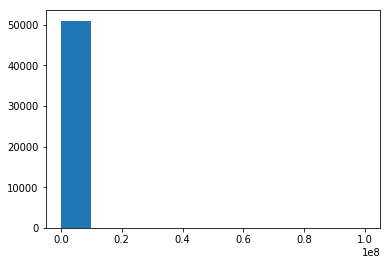

In [7]:
plt.hist(features["goal"])

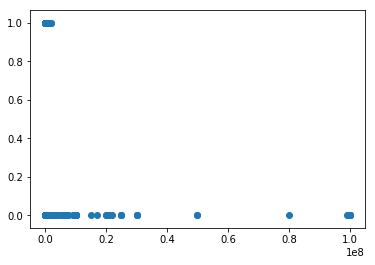

In [25]:
plt.scatter(features["goal"],features["founded_bool"])

In [486]:
features1=features[features["goal"]<10000]

In [68]:
features1_F=features1[features1["founded_bool"]==True]
features1_UF=features1[features1["founded_bool"]==False]

(array([9321., 5509., 4964., 2965.,  807., 4721., 1527., 1569., 1247.,
         531.]), array([1.000000e-02, 1.000008e+03, 2.000006e+03, 3.000004e+03,
        4.000002e+03, 5.000000e+03, 5.999998e+03, 6.999996e+03,
        7.999994e+03, 8.999992e+03, 9.999990e+03]), <a list of 10 Patch objects>)

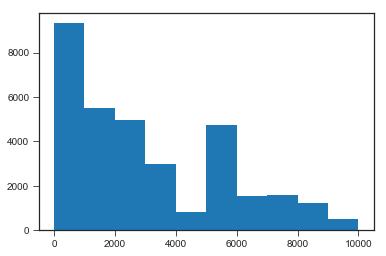

In [60]:
plt.hist(features1["goal"])

(array([3215., 1912., 1822., 1016.,  284., 2244.,  613.,  711.,  518.,
         240.]),
 array([1.e+00, 1.e+03, 2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03,
        8.e+03, 9.e+03, 1.e+04]),
 <a list of 10 Patch objects>)

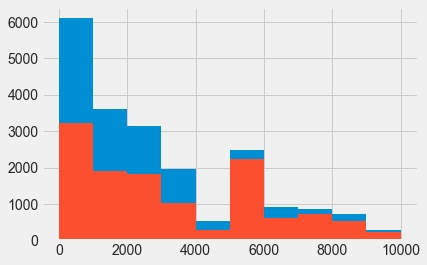

In [736]:
plt.hist(features1_F["goal"])
plt.hist(features1_UF["goal"],label="UF")

(array([3215., 1912., 1822., 1016.,  284., 2244.,  613.,  711.,  518.,
         240.]),
 array([1.e+00, 1.e+03, 2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03,
        8.e+03, 9.e+03, 1.e+04]),
 <a list of 10 Patch objects>)

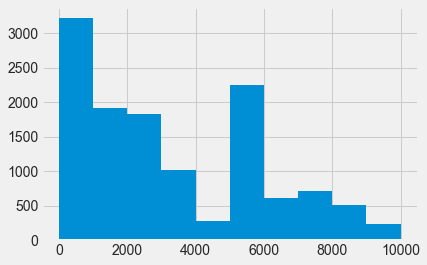

In [737]:
plt.hist(features1_UF["goal"],label="UF")

In [51]:
ag=features1.groupby('code').founded_bool.value_counts().sort_index()
#ag_ample=features.groupby('category').founded_bool.value_counts().sort_index()
ag_price=features1.groupby("code").goal.sum().sort_index()
ag.unstack()

founded_bool,False,True
code,,
0,1879,2293
1,422,1337
2,696,553
3,119,628
4,396,647
5,754,551
6,1491,2815
7,1031,867
8,618,1169


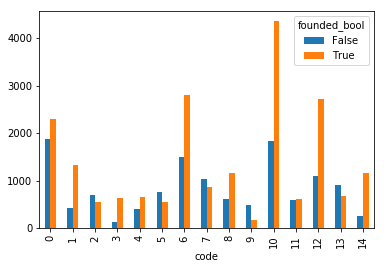

In [52]:
ag.unstack().plot(kind='bar')
#ag_ample.unstack().plot(kind="bar")
#plt.savefig("bias.jpeg")

In [70]:
features1=features1.drop(columns=["freq_bold_R","freq_italic_R"])

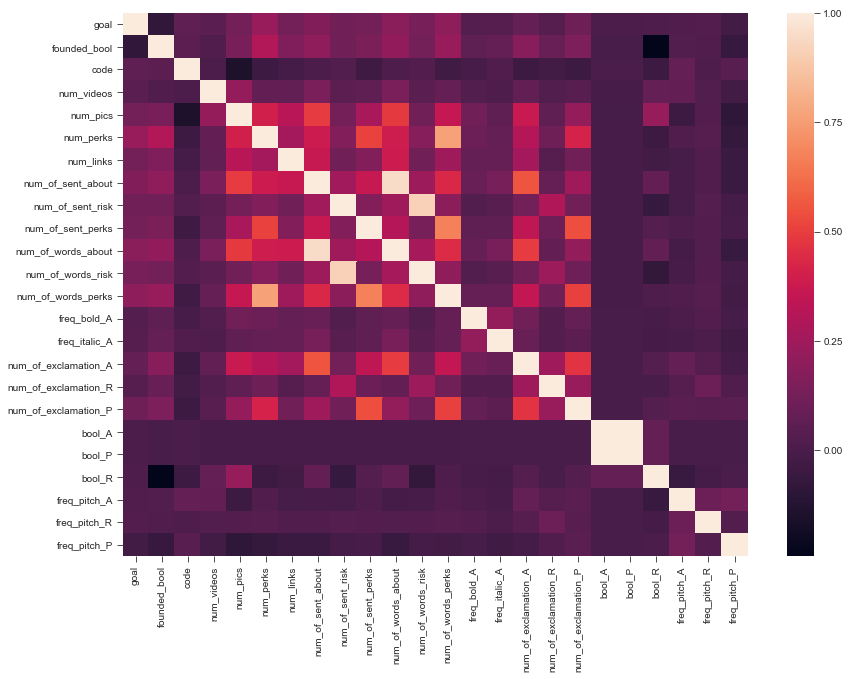

In [71]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(14, 10)

sns.heatmap(features1.corr())

In [72]:
features1.corr()["founded_bool"]

goal                   -0.079420
founded_bool            1.000000
code                    0.056816
num_videos              0.018621
num_pics                0.138023
num_perks               0.303544
num_links               0.158431
num_of_sent_about       0.206901
num_of_sent_risk        0.118968
num_of_sent_perks       0.148886
num_of_words_about      0.209794
num_of_words_risk       0.123618
num_of_words_perks      0.231897
freq_bold_A             0.059618
freq_italic_A           0.078532
num_of_exclamation_A    0.182733
num_of_exclamation_R    0.088563
num_of_exclamation_P    0.151181
bool_A                 -0.002622
bool_P                 -0.002622
bool_R                 -0.242285
freq_pitch_A            0.022828
freq_pitch_R            0.016147
freq_pitch_P           -0.058256
Name: founded_bool, dtype: float64

In [73]:
features1=features1.drop(columns=["bool_R"])
features1_F=features1_F.drop(columns=["bool_R"])
features1_UF=features1_UF.drop(columns=["bool_R"])

# BY eye comparison by class of different features 

In [75]:
len(features1.keys())

23

In [ ]:
plt.figure()
    sns.kdeplot(features[str(key)],label="UF",color="r",shade=True)
    sns.kdeplot(features1_F[str(key)],label="F",color="g",shade=True)
    plt.title(str(key))
    plt.show()

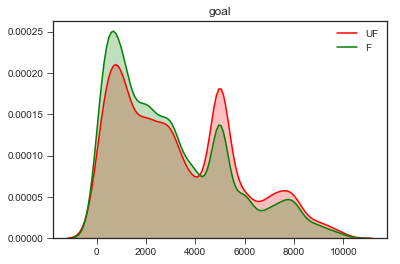

/Users/natacha/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/natacha/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/natacha/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


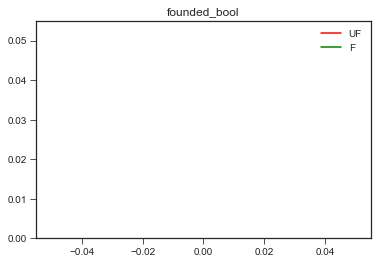

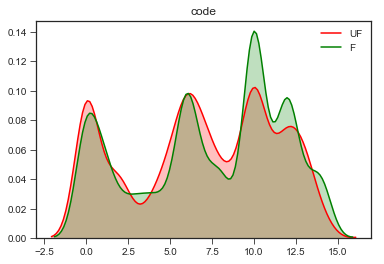

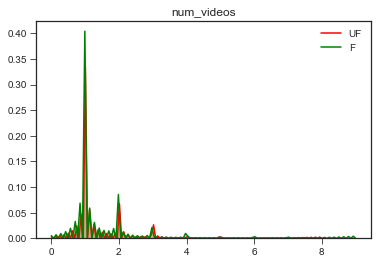

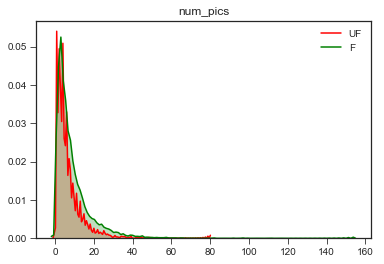

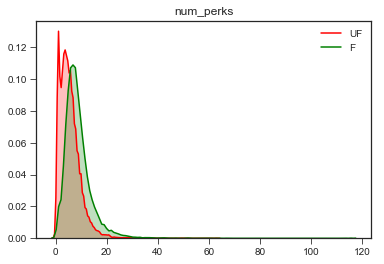

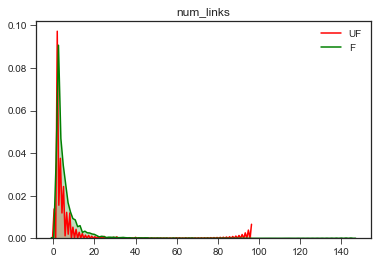

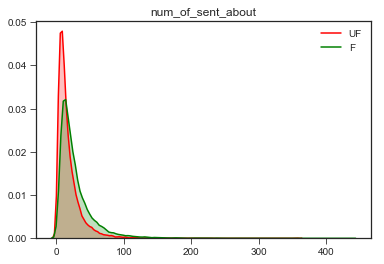

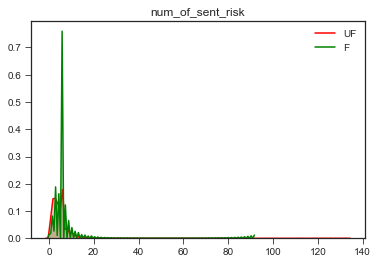

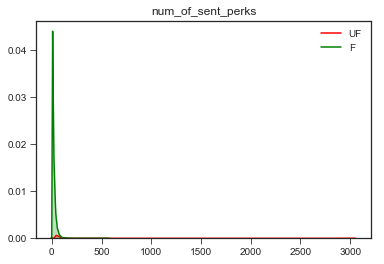

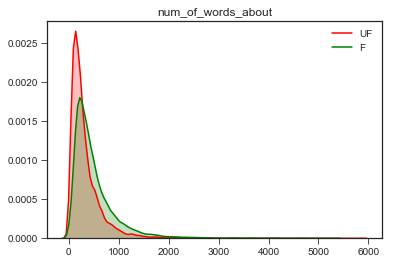

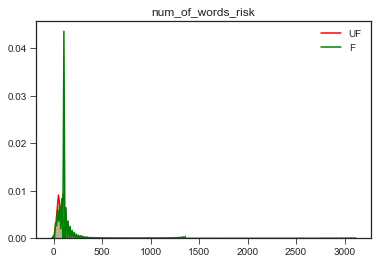

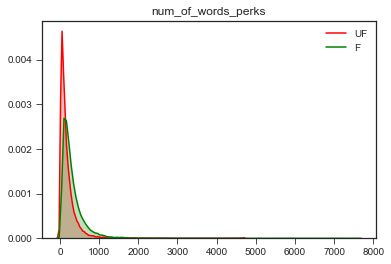

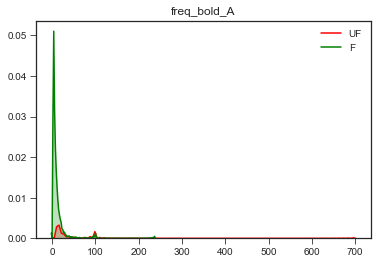

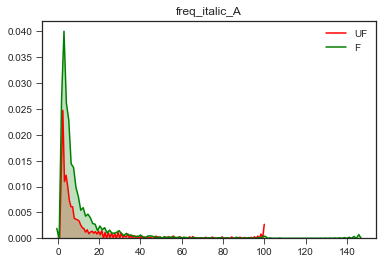

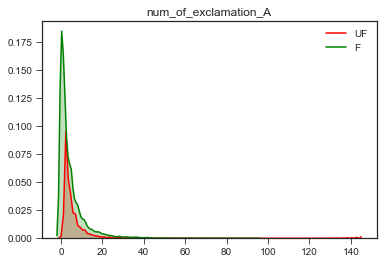

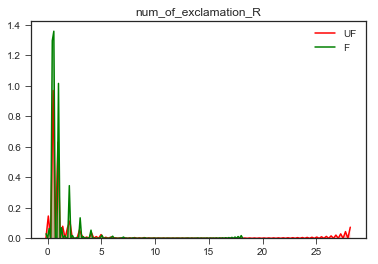

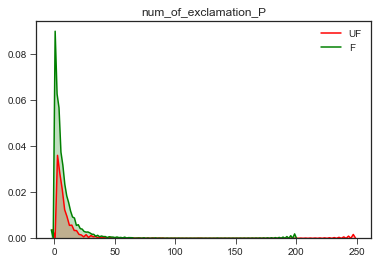

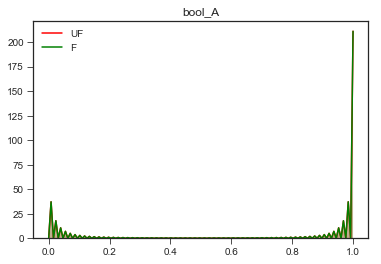

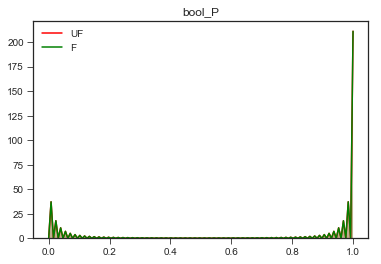

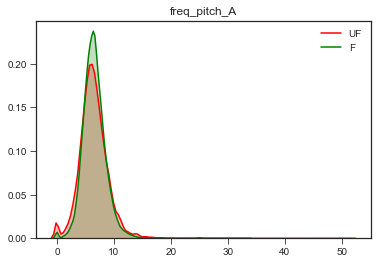

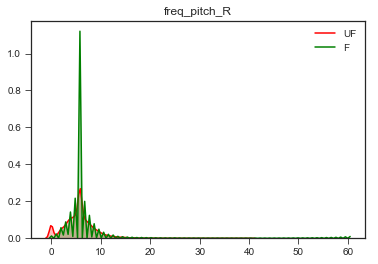

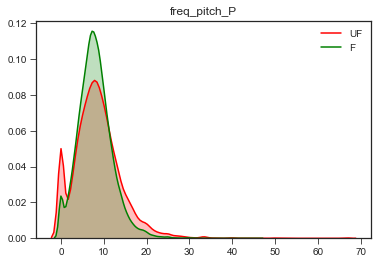

In [83]:
for key in features1.keys():
    plt.figure()
    sns.kdeplot(features1_UF[str(key)],label="UF",color="r",shade=True)
    sns.kdeplot(features1_F[str(key)],label="F",color="g",shade=True)
    plt.title(str(key))
    plt.show()

# General comments

1. We don't have enough data from compings that have goals >10000. We have removed them from the analysis and focus our algorithms on campaings with goals<10000.